In [229]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [230]:
df = pd.read_csv('../udataset/meat/production.csv')
MEAT = 'Beef'

df = df[['DateTime', MEAT]]
df['DateTime'] = pd.to_datetime(df['DateTime'])

df

,DateTime,Beef
0,1921-01-01,3.580000e+08
1,1921-02-01,2.790000e+08
2,1921-03-01,3.400000e+08
3,1921-04-01,3.160000e+08
4,1921-05-01,3.190000e+08
...,...,...
1207,2023-08-01,2.329500e+09
1208,2023-09-01,2.114600e+09
1209,2023-10-01,2.300800e+09
1210,2023-11-01,2.247300e+09


In [231]:
train_df = df[df['DateTime'].dt.year < 2005]
test_df = df[df['DateTime'].dt.year >= 2005]
train_df, test_df

train_df = train_df.dropna()
test_df = test_df.dropna()

In [232]:
train_data = train_df.to_numpy()
train_labels = train_data[:, 1]

In [233]:
test_data = test_df.to_numpy()
test_labels = test_data[:, 1]

In [234]:
train_df = train_df.drop(columns=MEAT)
test_df = test_df.drop(columns=MEAT)

# train_df.reset_index(inplace=True)

# train_data = train_df.to_numpy()
# test_data = test_df.to_numpy()
train_df['DateTime'] = range(len(train_df))
test_df['DateTime'] = range(len(test_df))

train_data = train_df.to_numpy()
test_data = test_df.to_numpy()


train_data, train_labels

(array([[  0],
        [  1],
        [  2],
        [  3],
        [  4],
        [  5],
        [  6],
        [  7],
        [  8],
        [  9],
        [ 10],
        [ 11],
        [ 12],
        [ 13],
        [ 14],
        [ 15],
        [ 16],
        [ 17],
        [ 18],
        [ 19],
        [ 20],
        [ 21],
        [ 22],
        [ 23],
        [ 24],
        [ 25],
        [ 26],
        [ 27],
        [ 28],
        [ 29],
        [ 30],
        [ 31],
        [ 32],
        [ 33],
        [ 34],
        [ 35],
        [ 36],
        [ 37],
        [ 38],
        [ 39],
        [ 40],
        [ 41],
        [ 42],
        [ 43],
        [ 44],
        [ 45],
        [ 46],
        [ 47],
        [ 48],
        [ 49],
        [ 50],
        [ 51],
        [ 52],
        [ 53],
        [ 54],
        [ 55],
        [ 56],
        [ 57],
        [ 58],
        [ 59],
        [ 60],
        [ 61],
        [ 62],
        [ 63],
        [ 64],
        [ 65],
        [ 

In [235]:
model = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

model.fit(train_data, train_labels)

preds = model.predict(test_data)

In [236]:
np.absolute(test_labels - preds).mean()



1767463868.9122808

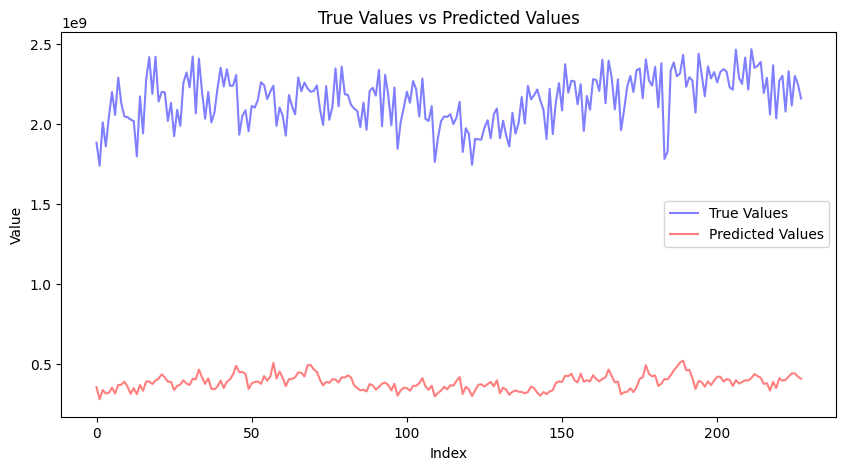

In [237]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(test_labels)), test_labels, color='blue', label='True Values', alpha=0.5)
plt.plot(range(len(preds)), preds, color='red', label='Predicted Values', alpha=0.5)
plt.title('True Values vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()